Objective:   
To explore sentiments of the customers by analysing reviews from an anonymized women’s clothing E-commerce platform

## Imports

In [94]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
import nltk
from sklearn.linear_model import LogisticRegression

In [4]:
#loading data in pandas dataframe
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [5]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.5+ MB


In [7]:
df.shape

(23486, 11)

Observation: Dataset consists of 11 columns and 23,485 rows/records

1. what datatypes are present in the dataset? 

In [8]:
df.dtypes.value_counts()

int64     6
object    5
dtype: int64

Observation: There are 6 integer and 5 object datatypes in the data

3. What are the statistics of the data?

In [9]:
#statistics of data
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Observations:  
1. Unnamed column contains the serial number of the reviews.  
2. Clothing ID contains the IDs of different clothes, multiple cloths have same cloth IDs (encoded column)  
3. Minimum Age of the reviewer is 18, maximum age is 99, most records have the ages between 40 and 50.  
4. Recommended IND is a boolean type contains 0(Not Recommended) and 1(Recommended).  
5. Positive Feedback Count contains count of the positive feedback, minimum positive feedback count is 0 


In [10]:
#statistics of object type columns
df.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


Observations:  
1. There are 13993 unique titles in the dataset.  
2.  Review Text column contains the reviews written by the clients  
3. Division Name, Department Name and Class Name are the categorical variables




4. Are there any null values in the data?

In [11]:
df.isnull()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23481,False,False,False,False,False,False,False,False,False,False,False
23482,False,False,False,False,False,False,False,False,False,False,False
23483,False,False,False,False,False,False,False,False,False,False,False
23484,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Sum of the null values in the columns 
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Text(0, 0.5, 'Count of Missing Values')

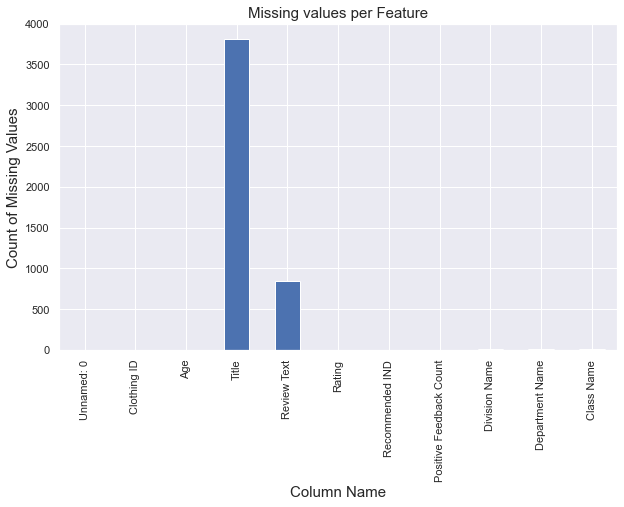

In [13]:
sns.set(rc={'figure.figsize':(10,6)})
pd.isnull(df).sum().plot(kind='bar')
plt.title('Missing values per Feature',size = 15)
plt.xlabel('Column Name',size = 15)
plt.ylabel('Count of Missing Values', size = 15)

Observation:  
1. Title column contains 3810 missing records  
2. Review Text contains 845 missing records  
3. Division Name, Department Name and Class Name contain 14 missing values each

5. What is the percentage of null values?

In [14]:
df.isnull().sum()/len(df)*100

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

Observation: There are 16% missing values in Title, 3.6% in Review Text, 0.6% in Division Name, Department Name and Class Name each.

### Univariate Analysis

6. What does the field Clothing ID contains?

In [15]:
df['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

In [16]:
len(df['Clothing ID'].unique())

1206

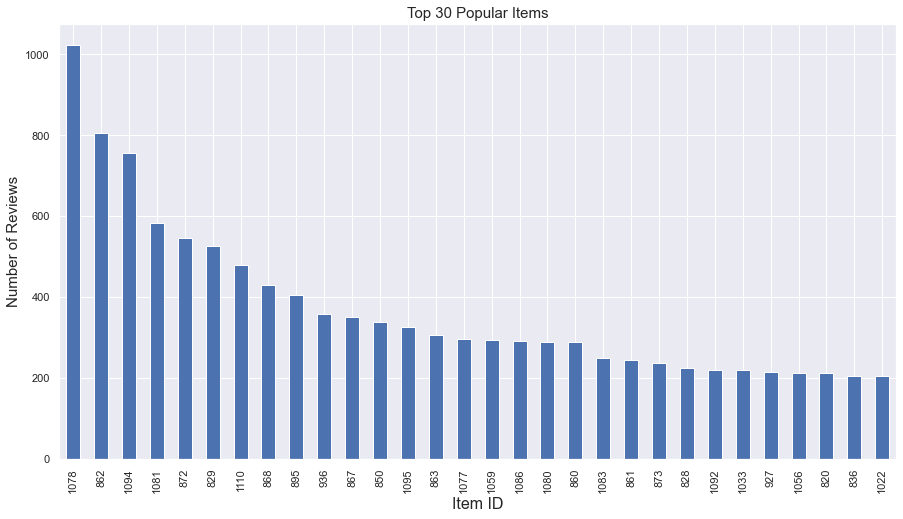

In [17]:
####Top 50 Most Popular item
fig = plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
plt.xlabel('Item ID',size=16)
plt.ylabel('Number of Reviews',size =15)
plt.title("Top 30 Popular Items",size=15)
df['Clothing ID'].value_counts()[:30].plot(kind='bar');

Observation: Clothing ID contains 1,206 unique IDs.  
It shows that clothing ID 1078 is most reviewed.  
This column is annonimised

7. Exploring Ratings

In [18]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

<b>Observation: It is an ordinal column, contains Ratings from 1 to 5. </b>

Text(0.5, 1.0, 'Frequency Distribution of Rating')

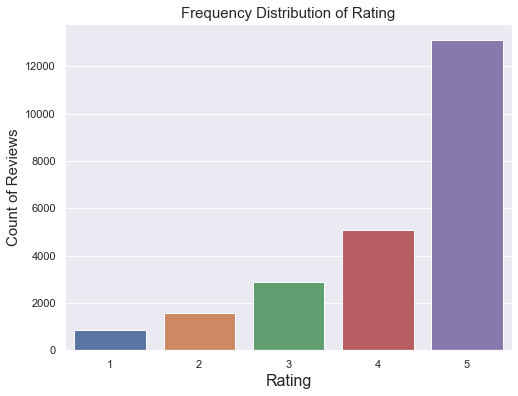

In [19]:
#visualization of ratings
fig,ax=plt.subplots(figsize=(8,6))
sns.countplot(df['Rating'])
plt.xlabel('Rating',size =16)
plt.ylabel('Count of Reviews', size =15)
plt.title("Frequency Distribution of Rating",size=15)

<b>Observation: Most of the people have given high ratings.</b>

7.1 What is the percentage of  different ratings

In [20]:
df['Rating'].value_counts()/len(df)*100

5    55.909904
4    21.617134
3    12.224304
2     6.663544
1     3.585115
Name: Rating, dtype: float64

<b>Observation: 56% records where Rating is 5,  
    21.6% where Rating is 4,   
    12% records are of Rating 3,  
    6% of Rating 2 and   
    3.5% records where Rating is 1.</b> 


8. What does the Title contain?

In [21]:
df['Title'].value_counts()

Love it!                               136
Beautiful                               95
Love                                    88
Love!                                   84
Beautiful!                              72
                                      ... 
Sleek and unique but not sure . . .      1
The sleeves.....                         1
Everyday perfect!                        1
Beyond boxy                              1
Not polyester, allelujah!                1
Name: Title, Length: 13993, dtype: int64

<b> Observation: It can be seen from the value count of Titles that Love and Beautiful are the most frequently occuring titles. It is also observed that these titles occur with and without exclamation marks.</b>(removing the punctuations can help) 

In [22]:
#percentage of missing values in title
df['Title'].notnull().value_counts()/len(df)*100

True     83.77757
False    16.22243
Name: Title, dtype: float64

Observation: More than 16% titles are missing

9. Exploring Recommended IND

In [23]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

In [24]:
df['Recommended IND'].value_counts()/len(df)*100

1    82.236226
0    17.763774
Name: Recommended IND, dtype: float64

<b>Observation: 82% of the records contain Recommended IND = 1, 18% of the records contain 0 in Recommended IND <b>

10. Exploring Age

In [25]:
df['Age'].value_counts()

39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

Text(0.5, 1.0, 'Number of review per Age')

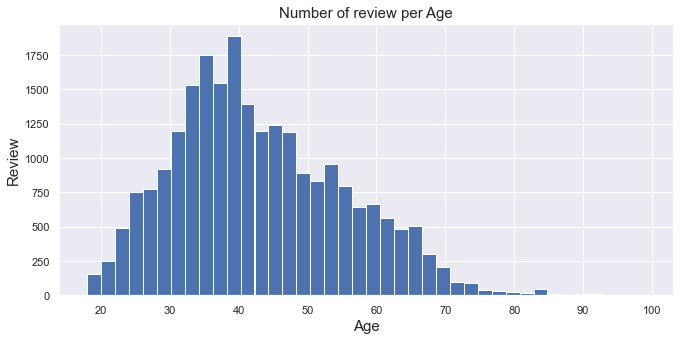

In [26]:
sns.set(rc={'figure.figsize':(11,5)})
plt.hist(df['Age'],bins=40)
plt.xlabel("Age",size=15)
plt.ylabel("Review",size=15)
plt.title("Number of review per Age",size=15)

<b>Observation: The above plot shows women from 30 to 50 year old age most engage in reviewing products</b>

#### Making buckets of Age for further analysis

In [27]:
df['age_bucket'] = pd.cut(x=df['Age'], bins=[18, 29, 39, 49,59,69,79,90,100], labels=['20s', '30s', '40s', '50s', '60s','70s', '80s','90s'])

In [28]:
df['age_bucket'].value_counts()

30s    7702
40s    6127
50s    3948
20s    2927
60s    2305
70s     364
80s      96
90s      13
Name: age_bucket, dtype: int64

Note: Age is cut into 8 buckets.  
Reviewers of Age 18 and 19 included in the bucket of 20s.

11. Department Name

In [29]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [30]:
#percentage od different department names
df['Department Name'].value_counts()/len(df)*100

Tops        44.571234
Dresses     26.905390
Bottoms     16.175594
Intimate     7.387380
Jackets      4.394107
Trend        0.506685
Name: Department Name, dtype: float64

Text(0, 0.5, 'Count')

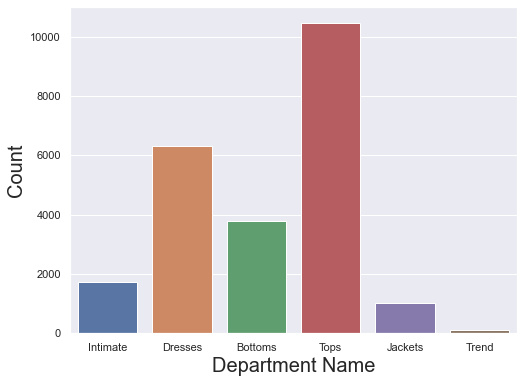

In [31]:
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(df['Department Name'])
plt.xlabel('Department Name',size=20)
plt.ylabel('Count', size =20)

Observation: It is observed that Tops and Dresses are the most commonly reviewed products.  
It would be interesting to investigate the motivation of leaving a review in the first place

12. Analysing Review Text

In [32]:
df['Review Text'].notnull().value_counts()/len(df)*100

True     96.402112
False     3.597888
Name: Review Text, dtype: float64

About 3.6% records where reviews are missing, It is an important feature for sentiment analysis  

In [33]:
#Filling null values with space
df['Review Text'] = df['Review Text'].fillna('')

In [34]:
l = list(df['Review Text'].values)
l = (",".join(l))
text = l.split(' ')

In [35]:
text

['Absolutely',
 'wonderful',
 '-',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable,Love',
 'this',
 'dress!',
 '',
 "it's",
 'sooo',
 'pretty.',
 '',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 '',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 '',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 '',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.,I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me.',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 '(my',
 'usual',
 'size)',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'outrageously',
 'small.',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',

14. Division Name

Text(0.5, 1.0, 'Distribution of Division Name')

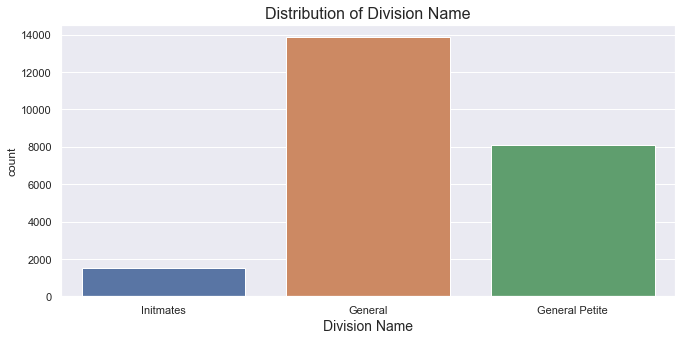

In [36]:
#Frequency distribution of division name
sns.countplot(x='Division Name',data=df)
plt.xlabel('Division Name',size =14)
plt.title("Distribution of Division Name",size=16)

In [37]:
df['Division Name'].value_counts()/len(df)*100

General           58.971302
General Petite    34.573789
Initmates          6.395299
Name: Division Name, dtype: float64

Observation: There are three categories of Division Name.  
59% of the records contain Devision name <b>General</b>, 35% contain <b>General Petite</b> and 6% of the records contain <b>Initmates</b>

15. Class Name

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

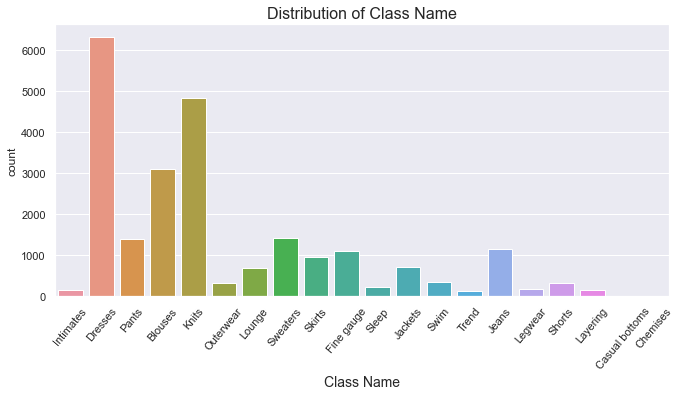

In [38]:
#Frequency distribution of class name
sns.countplot(x='Class Name',data=df)
plt.title("Distribution of Class Name",size=16)
plt.xlabel('Class Name',size=14)
plt.xticks(rotation=50)

In [39]:
df['Class Name'].value_counts()/len(df)*100

Dresses           26.905390
Knits             20.620795
Blouses           13.186579
Sweaters           6.080218
Pants              5.909904
Jeans              4.883761
Fine gauge         4.683641
Skirts             4.023674
Jackets            2.997530
Lounge             2.942178
Swim               1.490250
Outerwear          1.396577
Shorts             1.349740
Sleep              0.970791
Legwear            0.702546
Intimates          0.655710
Layering           0.621647
Trend              0.506685
Casual bottoms     0.008516
Chemises           0.004258
Name: Class Name, dtype: float64

<b>Observation: Dresses are reviewd the most, followed by Knits</b>

16. Positive feedback count

In [40]:
df['Positive Feedback Count'].value_counts()

0     11176
1      4043
2      2193
3      1433
4       922
      ...  
52        1
56        1
61        1
99        1
95        1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [41]:
df['Positive Feedback Count'].value_counts()/len(df)*100

0     47.585796
1     17.214511
2      9.337478
3      6.101507
4      3.925743
        ...    
52     0.004258
56     0.004258
61     0.004258
99     0.004258
95     0.004258
Name: Positive Feedback Count, Length: 82, dtype: float64

In [42]:
df['Positive Feedback Count'].unique()

array([  0,   4,   6,   1,  14,   2,   3,   7,   5,   9,  34,  10,  17,
        11,  24,  12,   8,  13,  20,  16,  23,  15,  19,  29,  32,  30,
        55,  84,  27,  43,  21,  42,  37,  71,  35,  65, 117,  33,  18,
        25,  47,  22,  51,  94,  31,  77,  61,  46,  26,  28,  36,  57,
        45,  66,  82,  44,  81,  58,  78,  38,  49,  52, 122,  41, 108,
        54,  40,  53,  87,  64,  89,  68,  56,  98,  95,  39,  93,  48,
        99,  50,  69,  59], dtype=int64)

In [43]:
len(df['Positive Feedback Count'].unique())

82

In [44]:
df['Positive Feedback Count'].max()

122

Observation: There are 82 unique counts for positive feedback.  
More than 47% of the records contain positive feedback count = 0.  
Maximum positive feedback count = 122.

### Multivariate Analysis

1. Rating Vs Positive feedback count

Text(0, 0.5, 'Positive Feedback Count')

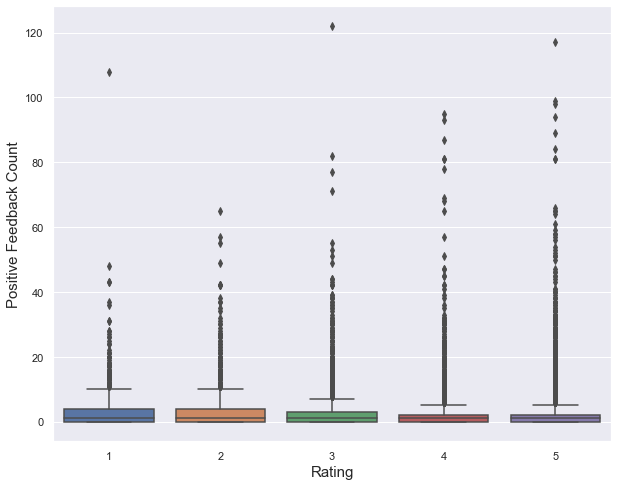

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Rating', y = 'Positive Feedback Count', data = df)
plt.xlabel('Rating',size = 15)
plt.ylabel('Positive Feedback Count', size = 15)

Observation: The boxplot of Rating and Positive feedback count shows some unusual results  
There exist some outliers, Count of positive feedback is low where rating is high.  
This needs to be analysed further.

Q: How many records are present in the data where Rating is equal to 5 but the positive feedback count is 0?

In [46]:
temp = df[df['Rating']== 5]

In [47]:
(temp['Positive Feedback Count']==0).value_counts()

False    6663
True     6468
Name: Positive Feedback Count, dtype: int64

<b>Observation: There are 6468 records where Rating = 5 but the Positive Feedback Count = 0.</b>

Do Ratings vary with Age group?

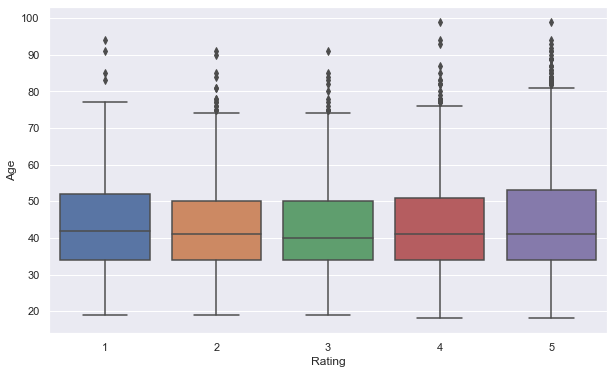

In [48]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='Rating',y='Age',data = df)

In [49]:
pd.crosstab(df['age_bucket'],df['Rating'])

Rating,1,2,3,4,5
age_bucket,,,,,
20s,97,179,393,627,1631
30s,265,549,1001,1680,4207
40s,231,444,753,1395,3304
50s,146,238,442,835,2287
60s,84,119,237,459,1406
70s,15,30,39,68,212
80s,2,5,5,8,76
90s,2,1,1,3,6


In [50]:
pd.crosstab(df['age_bucket'],df['Rating']).apply(lambda x: x/x.sum(),axis = 1)

Rating,1,2,3,4,5
age_bucket,,,,,
20s,0.033140,0.061155,0.134267,0.214213,0.557226
30s,0.034407,0.071280,0.129966,0.218125,0.546222
40s,0.037702,0.072466,0.122899,0.227681,0.539252
50s,0.036981,0.060284,0.111955,0.211499,0.579281
60s,0.036443,0.051627,0.102820,0.199132,0.609978
70s,0.041209,0.082418,0.107143,0.186813,0.582418
80s,0.020833,0.052083,0.052083,0.083333,0.791667
90s,0.153846,0.076923,0.076923,0.230769,0.461538


Observation: There seems a little variation in the rating of different age groups

1. Recommendation should be highly correlated with the Rating

In [53]:
pd.crosstab(df['Rating'], df['Recommended IND'])

Recommended IND,0,1
Rating,,
1,826,16
2,1471,94
3,1682,1189
4,168,4909
5,25,13106


In [54]:
pd.crosstab(df['Rating'],df['Recommended IND']).apply(lambda x: x/x.sum(),axis = 1)

Recommended IND,0,1
Rating,,
1,0.980998,0.019002
2,0.939936,0.060064
3,0.585859,0.414141
4,0.033090,0.966910
5,0.001904,0.998096


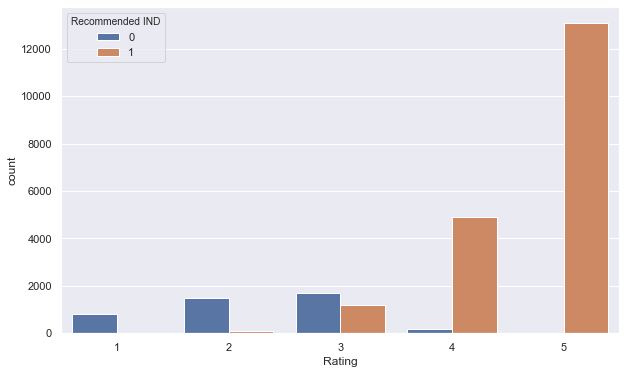

In [55]:
fig,ax = plt.subplots(figsize = (10,6))
sns.countplot(x= 'Rating', hue = 'Recommended IND', data = df )

In [56]:
df.groupby(['Rating', 'Recommended IND'])['Recommended IND'].count()

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

Observation: The graph suggests Items with lower rating are not recommended (0) and those of higher rating are recommended (1).  
There are 24 records where rating = 5 but the product is not recommended, there are 168 such records for rating = 4.

2. Does Division name affect Recommendation?

In [57]:
pd.crosstab(df['Division Name'],df['Recommended IND']).apply(lambda x: x/x.sum(),axis = 1)

Recommended IND,0,1
Division Name,,
General,0.183177,0.816823
General Petite,0.174015,0.825985
Initmates,0.147803,0.852197


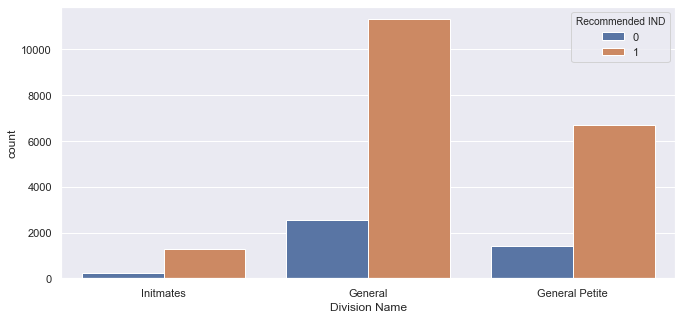

In [58]:
sns.countplot(x='Division Name', hue = 'Recommended IND', data = df)

Observation: There are 81% records of General, 82% General Petite and 85% Initmates where Recommended IND = 1.  
Recommended IND does not vary significantly with Division Name.

3. Do women rate different Divisions differently?

In [59]:
pd.crosstab(df['Division Name'],df['Rating']).apply(lambda x: x/x.sum(), axis= 1)

Rating,1,2,3,4,5
Division Name,,,,,
General,0.035451,0.069314,0.128014,0.217617,0.549603
General Petite,0.036576,0.065025,0.116133,0.215271,0.566995
Initmates,0.035952,0.051265,0.103196,0.209720,0.599867


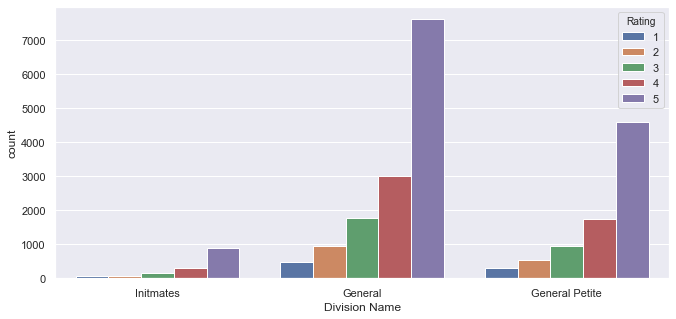

In [60]:
sns.countplot(x= 'Division Name', hue = 'Rating', data = df)

Observation: Majority of the reviews are for General wear, majority of the ratings are high.  
It is shown in the above plot and the crosstable that rating does not have any significant relation with Division Name.

4. Which department is recommended and which is not?

In [61]:
pd.crosstab(df['Department Name'],df['Recommended IND']).apply(lambda x: x/x.sum(), axis = 1)

Recommended IND,0,1
Department Name,,
Bottoms,0.148723,0.851277
Dresses,0.191803,0.808197
Intimate,0.149856,0.850144
Jackets,0.163760,0.836240
Tops,0.184849,0.815151
Trend,0.260504,0.739496


In [62]:
df.groupby(by = ['Department Name'])['Recommended IND'].describe()

,count,mean,std,min,25%,50%,75%,max
Department Name,,,,,,,,
Bottoms,3799.0,0.851277,0.355862,0.0,1.0,1.0,1.0,1.0
Dresses,6319.0,0.808197,0.393750,0.0,1.0,1.0,1.0,1.0
Intimate,1735.0,0.850144,0.357033,0.0,1.0,1.0,1.0,1.0
Jackets,1032.0,0.836240,0.370237,0.0,1.0,1.0,1.0,1.0
Tops,10468.0,0.815151,0.388194,0.0,1.0,1.0,1.0,1.0
Trend,119.0,0.739496,0.440766,0.0,0.0,1.0,1.0,1.0


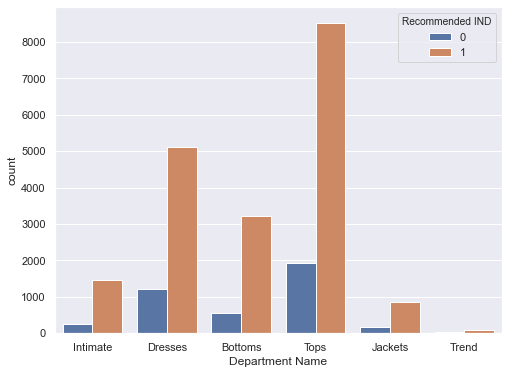

In [63]:
fig,ax= plt.subplots(figsize=(8,6))
sns.countplot(x= 'Department Name',hue = 'Recommended IND', data = df)

Observation: There seems no variation in the Recommend IND for different Department Names.  
standard deviation of Trendy clothes is different from others

Do women give different ratings to different departments?

Text(0, 0.5, 'Number of Reviews')

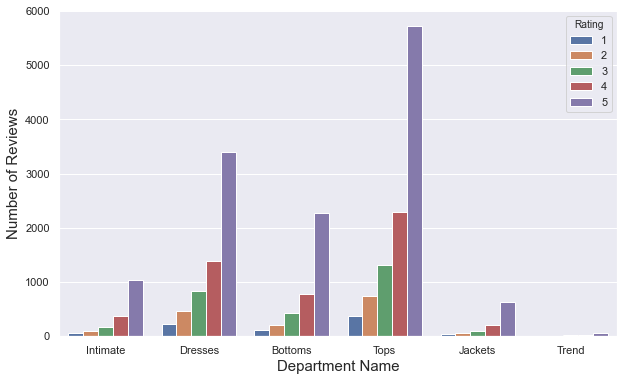

In [64]:
fig,ax= plt.subplots(figsize=(10,6))
sns.countplot(x= 'Department Name',hue = 'Rating', data = df)
plt.xlabel('Department Name', size = 15)
plt.ylabel('Number of Reviews', size =15)

In [65]:
pd.crosstab(df['Department Name'],df['Rating'])

Rating,1,2,3,4,5
Department Name,,,,,
Bottoms,115,205,421,785,2273
Dresses,228,461,838,1395,3397
Intimate,63,90,178,371,1033
Jackets,49,60,91,201,631
Tops,376,738,1324,2299,5731
Trend,11,11,19,26,52


In [66]:
pd.crosstab(df['Department Name'],df['Rating']).apply(lambda x: x/x.sum(),axis = 1)

Rating,1,2,3,4,5
Department Name,,,,,
Bottoms,0.030271,0.053962,0.110819,0.206633,0.598315
Dresses,0.036082,0.072955,0.132616,0.220763,0.537585
Intimate,0.036311,0.051873,0.102594,0.213833,0.595389
Jackets,0.047481,0.058140,0.088178,0.194767,0.611434
Tops,0.035919,0.070501,0.126481,0.219622,0.547478
Trend,0.092437,0.092437,0.159664,0.218487,0.436975


Observation: There seems no significant difference between the ratings of different departments

How do ratings vary for each age group across Classes of products?

Text(0, 0.5, 'Review Count')

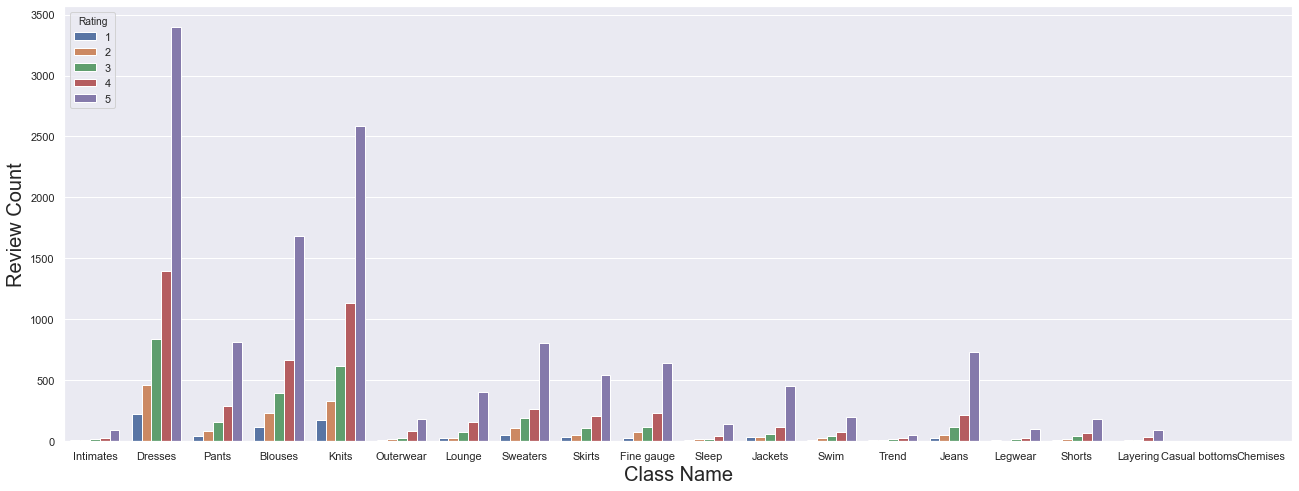

In [67]:
fig, ax = plt.subplots(figsize = (22,8))
sns.countplot(x= 'Class Name', hue = 'Rating', data = df)
plt.xlabel('Class Name', size = 20)
plt.ylabel('Review Count', size = 20)

In [68]:
#Analysing ratings for different class names
pd.crosstab(df['Class Name'],df['Rating'])

Rating,1,2,3,4,5
Class Name,,,,,
Blouses,119,229,394,669,1686
Casual bottoms,0,0,0,1,1
Chemises,0,0,0,1,0
Dresses,228,461,838,1395,3397
Fine gauge,30,75,119,230,646
Intimates,7,8,16,27,96
Jackets,35,38,62,118,451
Jeans,30,55,115,218,729
Knits,178,328,616,1132,2589


In [69]:
#caalculating the percentage of each rating for every class
pd.crosstab(df['Class Name'], df['Rating']).apply(lambda x: x/x.sum(), axis = 1)

Rating,1,2,3,4,5
Class Name,,,,,
Blouses,0.038424,0.073943,0.127220,0.216015,0.544398
Casual bottoms,0.000000,0.000000,0.000000,0.500000,0.500000
Chemises,0.000000,0.000000,0.000000,1.000000,0.000000
Dresses,0.036082,0.072955,0.132616,0.220763,0.537585
Fine gauge,0.027273,0.068182,0.108182,0.209091,0.587273
Intimates,0.045455,0.051948,0.103896,0.175325,0.623377
Jackets,0.049716,0.053977,0.088068,0.167614,0.640625
Jeans,0.026155,0.047951,0.100262,0.190061,0.635571
Knits,0.036754,0.067727,0.127194,0.233739,0.534586


In [70]:
df.groupby(by = ['Class Name'])['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Class Name,,,,,,,,
Blouses,3097.0,4.154020,1.135738,1.0,4.00,5.0,5.00,5.0
Casual bottoms,2.0,4.500000,0.707107,4.0,4.25,4.5,4.75,5.0
Chemises,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
Dresses,6319.0,4.150815,1.124371,1.0,4.00,5.0,5.00,5.0
Fine gauge,1100.0,4.260909,1.070797,1.0,4.00,5.0,5.00,5.0
Intimates,154.0,4.279221,1.128923,1.0,4.00,5.0,5.00,5.0
Jackets,704.0,4.295455,1.143070,1.0,4.00,5.0,5.00,5.0
Jeans,1147.0,4.360942,1.016689,1.0,4.00,5.0,5.00,5.0
Knits,4843.0,4.161677,1.112470,1.0,4.00,5.0,5.00,5.0


Observation: There seems  difference between the ratings of all the classes of clothes.  
(This column might contribute in our model)

Which age group gives what length of comments on what type of clothes?

In [71]:
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_bucket,Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50s,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192


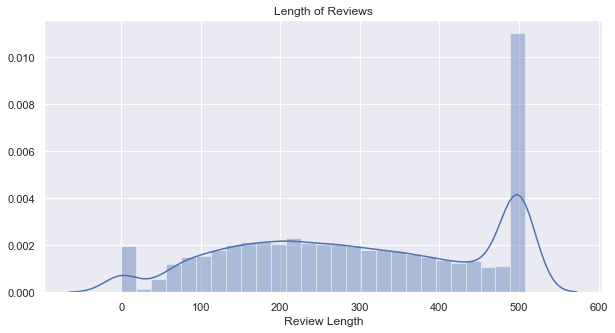

In [72]:
fig = plt.figure(figsize=(10, 5))
ax = sns.distplot(df['Review Length'])
ax = plt.title("Length of Reviews")

In [73]:
df['Review Length'].describe()

count    23486.000000
mean       297.581623
std        152.572698
min          0.000000
25%        173.000000
50%        292.000000
75%        451.000000
max        508.000000
Name: Review Length, dtype: float64

Observation: Length of reviews vary from 0(no review) to 508. with a standard deviation of 152

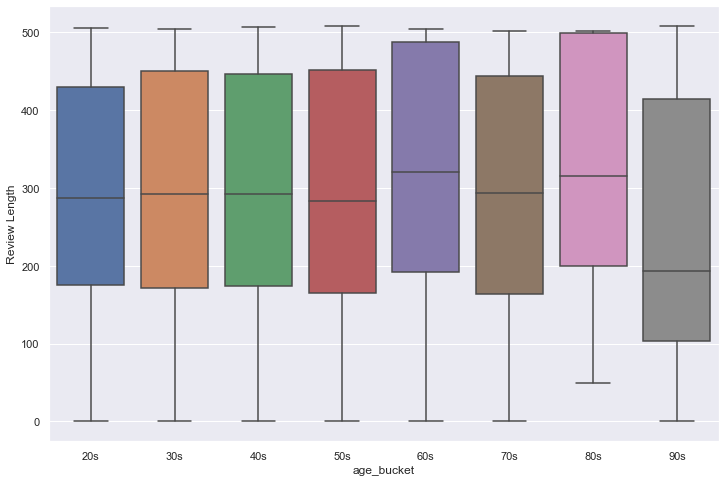

In [74]:
#visualizing review lengthof different age groups
plt.figure(figsize=(12,8))
sns.boxplot(x ='age_bucket' , y = 'Review Length', data = df)

Observation: Women in their 80s and 60s write longer reviews  
Length of reviews is shorter for age bucket 90s except some outliers

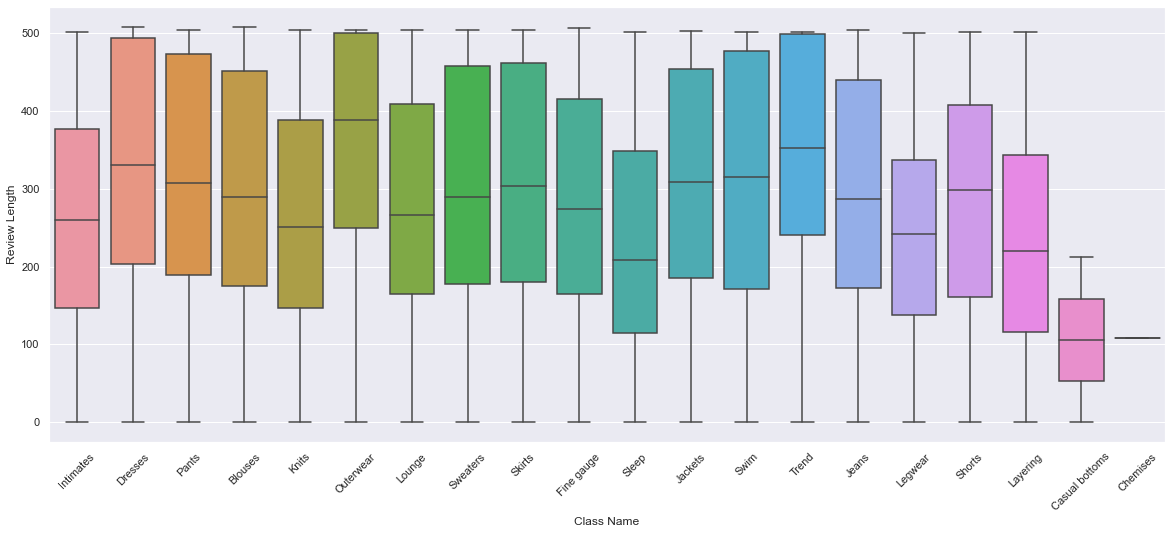

In [75]:
#Visualizing review lengths of different classes
fig,ax=plt.subplots(figsize = (20,8)) 
sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
ax=plt.xticks(rotation=45)

Observation: People tend to write longer reviews for Dresses,Pants, Outerwear and trendy clothes 

What is the correlation between different data fields?

In [76]:
correlation = df.corr()

In [77]:
correlation

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Review Length
Unnamed: 0,1.000000,-0.006072,-0.007749,-0.002568,-0.003887,-0.002907,0.009525
Clothing ID,-0.006072,1.000000,0.017972,-0.018879,-0.016206,0.046356,0.096805
Age,-0.007749,0.017972,1.000000,0.026831,0.030622,0.043079,0.026631
Rating,-0.002568,-0.018879,0.026831,1.000000,0.792336,-0.064961,-0.073289
Recommended IND,-0.003887,-0.016206,0.030622,0.792336,1.000000,-0.069045,-0.046714
Positive Feedback Count,-0.002907,0.046356,0.043079,-0.064961,-0.069045,1.000000,0.208822
Review Length,0.009525,0.096805,0.026631,-0.073289,-0.046714,0.208822,1.000000


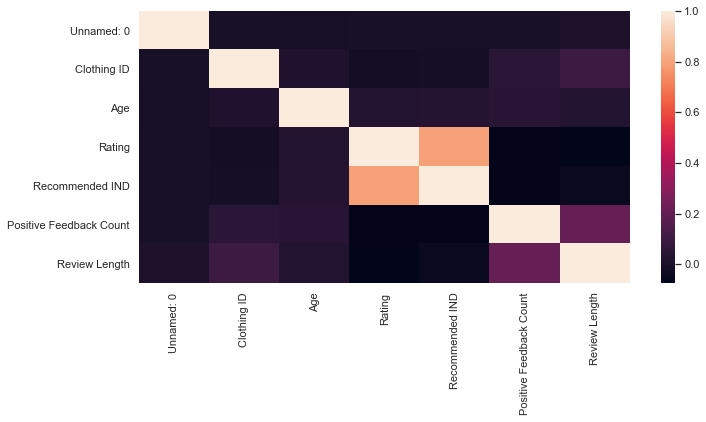

In [78]:
#ploting heatmap to get an overview
sns.heatmap(correlation)

Observation: The heatmap shows that there is a strong correlation between Rating and Recommended IND.

### Text Preprocessing

In [79]:
#defining a function to clean and tokenize the review text
#transfering the text to lowercase
def clean_and_tokenize(review):
    text = review.lower()
   
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    
    stemmer = nltk.stem.WordNetLemmatizer()
    text = " ".join(stemmer.lemmatize(token) for token in tokens)
    text = re.sub("[^a-z']"," ", text)
    return text
df["Clean_Review"] = df["Review Text"].apply(clean_and_tokenize)

In [80]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_bucket,Review Length,Clean_Review
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s,53,absolutely wonderful silky and sexy and comf...
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s,303,love this dress it 's sooo pretty i happene...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500,i had such high hope for this dress and really...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50s,124,i love love love this jumpsuit it 's fun ...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192,this shirt is very flattering to all due to th...


In [81]:
# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_bucket,Review Length,Clean_Review,Word Counts
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s,53,absolutely wonderful silky and sexy and comf...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s,303,love this dress it 's sooo pretty i happene...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s,500,i had such high hope for this dress and really...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,50s,124,i love love love this jumpsuit it 's fun ...,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,40s,192,this shirt is very flattering to all due to th...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


The above function gives us the count of the occurance of each word/ token in a review

### Feature Engineering

In [82]:
#creating a new dataframe containing important fields
df1 = df[['Class Name','Rating','Age','Review Text','Word Counts']]

In [83]:
df1.head()

,Class Name,Rating,Age,Review Text,Word Counts
0,Intimates,4,33,Absolutely wonderful - silky and sexy and comf...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,Dresses,5,34,Love this dress! it's sooo pretty. i happene...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,Dresses,3,60,I had such high hopes for this dress and reall...,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,Pants,5,50,"I love, love, love this jumpsuit. it's fun, fl...","{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,Blouses,5,47,This shirt is very flattering to all due to th...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


Note: Important columns are chosen from the EDA performed, columns that seems contributing are taken in df1.  
Ratings and Recommended IND are highly correlated that is why we are taking Rating only

In [84]:
#selecting some words that cary persons' emotions
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
dfwc = df1.copy()  
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nClass Names')
print(df1['Class Name'].fillna("Empty").value_counts().iloc[:5])

Selected Words
love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64

Class Names
Dresses     6319
Knits       4843
Blouses     3097
Sweaters    1428
Pants       1388
Name: Class Name, dtype: int64


Observation: It can be observed  that positive words as love, great, super were used more. When we look at the classes, customers mostly prefered dress, knits and blouses

------------------------

We do not have any column in the data that shows the sentiment is positive or negative that is why we are using the column rating. defining a new column named Sentiment and setting the value as True where the rating is 4 or higher. considering rating = 3 as neutral

In [85]:
# Set reviews which has 4 or higher rating as True (positive) 
df1 = df1[df1['Rating'] !=3]
df1['Sentiment'] = df1['Rating'] >=4
df1.head()


,Class Name,Rating,Age,Review Text,Word Counts,Sentiment
0,Intimates,4,33,Absolutely wonderful - silky and sexy and comf...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Dresses,5,34,Love this dress! it's sooo pretty. i happene...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,Pants,5,50,"I love, love, love this jumpsuit. it's fun, fl...","{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,Blouses,5,47,This shirt is very flattering to all due to th...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,Dresses,2,49,"I love tracy reese dresses, but this one is no...","{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


In [86]:
###Set True sentiment  as positive review and False as negative review
positive_reviews = df1[df1['Sentiment'] == True]
negative_reviews = df1[df1['Sentiment'] == False]

In [87]:
df1.head()

,Class Name,Rating,Age,Review Text,Word Counts,Sentiment
0,Intimates,4,33,Absolutely wonderful - silky and sexy and comf...,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1,Dresses,5,34,Love this dress! it's sooo pretty. i happene...,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
3,Pants,5,50,"I love, love, love this jumpsuit. it's fun, fl...","{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
4,Blouses,5,47,This shirt is very flattering to all due to th...,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
5,Dresses,2,49,"I love tracy reese dresses, but this one is no...","{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


### Model Training

In [88]:
# split data
train_data,test_data = train_test_split(df1,train_size=0.8,random_state=0)
# select the columns and prepare data for the models 
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

Applying Logistic Regression

In [89]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\users\sj\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
lr_pred = lr.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,lr_pred)
cm

array([[ 293,  165],
       [  84, 3581]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr_pred)

0.9396070822216832

In [93]:
# calculate the False Positive Rate and True Positive Rate for all thresholds of the classification
from sklearn import metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

-------------------------

### Feature Engineering

In [15]:
#deleting unnamed column as it contains serial number
df.drop(df.columns[0],inplace=True, axis=1)

There are only 0.059% values missing in the columns Department Name, 

In [79]:
#filling null values of Department name with most frequent values in the column
df['Department Name'].fillna(df["Department Name"].describe().top, inplace = True)